# Importing the dependencies

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Mount drive into colab and allocate file path to dataset

In [4]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Zoho_Coperation/Rotten_Tomatoes_Movies3.xls'

Mounted at /content/drive


## Load dataset into pandas dataframe

In [5]:
rt_data = pd.read_excel(file_path, engine ='xlrd')

# Data analysis (EDA)

## Checking the Info of the dataset

In [6]:
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

## Check First Five rows of the dataset to familiarize

In [7]:
rt_data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


## Checking Statistiacal measures of the dataset

In [8]:
rt_data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [57]:
# before More anaysing audience_rating is the target variable, must be drop the null values. Imputation would introduce bias
rt_data2 = rt_data.dropna(subset=['audience_rating'])
rt_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16386 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16386 non-null  object        
 1   movie_info          16368 non-null  object        
 2   critics_consensus   8281 non-null   object        
 3   rating              16386 non-null  object        
 4   genre               16369 non-null  object        
 5   directors           16282 non-null  object        
 6   writers             15109 non-null  object        
 7   cast                16126 non-null  object        
 8   in_theaters_date    15667 non-null  datetime64[ns]
 9   on_streaming_date   16385 non-null  datetime64[ns]
 10  runtime_in_minutes  16239 non-null  float64       
 11  studio_name         16010 non-null  object        
 12  tomatometer_status  16386 non-null  object        
 13  tomatometer_rating  16386 non-null  int64         


## Checking Unique value count in each column to get idea about cardinality

In [10]:
# Create an empty list to store the results
unique_value_counts = []

# Iterate through the selected columns
for column in rt_data.columns:
    if isinstance(rt_data[column].iloc[0], list):
        exploded_column = rt_data[column].explode()
    else:
        exploded_column = rt_data[column]

    # Count unique values and append to the list
    unique_value_counts.append((column, exploded_column.nunique()))

# Print the results
for column, count in unique_value_counts:
    print(f"Number of unique values in {column}: {count}")
    print('\n')

Number of unique values in movie_title: 16106


Number of unique values in movie_info: 16613


Number of unique values in critics_consensus: 8307


Number of unique values in rating: 8


Number of unique values in genre: 1080


Number of unique values in directors: 8314


Number of unique values in writers: 12121


Number of unique values in cast: 16326


Number of unique values in in_theaters_date: 5586


Number of unique values in on_streaming_date: 2260


Number of unique values in runtime_in_minutes: 201


Number of unique values in studio_name: 2886


Number of unique values in tomatometer_status: 3


Number of unique values in tomatometer_rating: 101


Number of unique values in tomatometer_count: 393


Number of unique values in audience_rating: 98




## Get idea about raing column and tomatomeater_status column unique value
*   Found tipos in rating column
1.   PG-13) instead PG-13
2.   R) instead R





In [11]:
# unique values and there representation in the dataset
columns_to_analyze = ['rating', 'tomatometer_status']

# Iterate through the specified columns
for column in columns_to_analyze:
    value_counts = rt_data[column].value_counts()
    print(f"Unique values in {column}:")
    print(value_counts)
    print("\n")

Unique values in rating:
rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64


Unique values in tomatometer_status:
tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64




## rating column unique categories and there distribuition
*   identified NC17 catergory data not enough for model training
*   tipos must be corrected



[Text(0, 0, '6116'),
 Text(0, 0, '4650'),
 Text(0, 0, '2876'),
 Text(0, 0, '2051'),
 Text(0, 0, '652'),
 Text(0, 0, '37'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

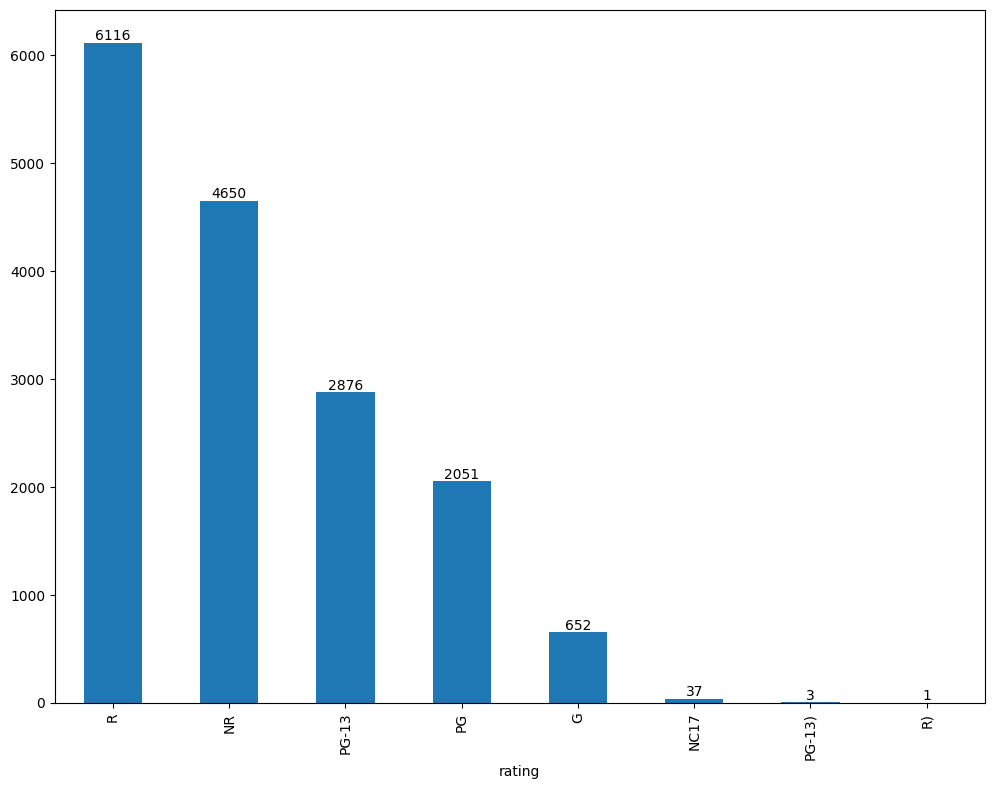

In [12]:
# unique categories and their distribution in the rating column
ax = rt_data2.rating.value_counts(). plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])  # type: ignore

## Tomatometer_status column unique categories and there distribuition

[Text(0, 0, '7160'), Text(0, 0, '6275'), Text(0, 0, '2951')]

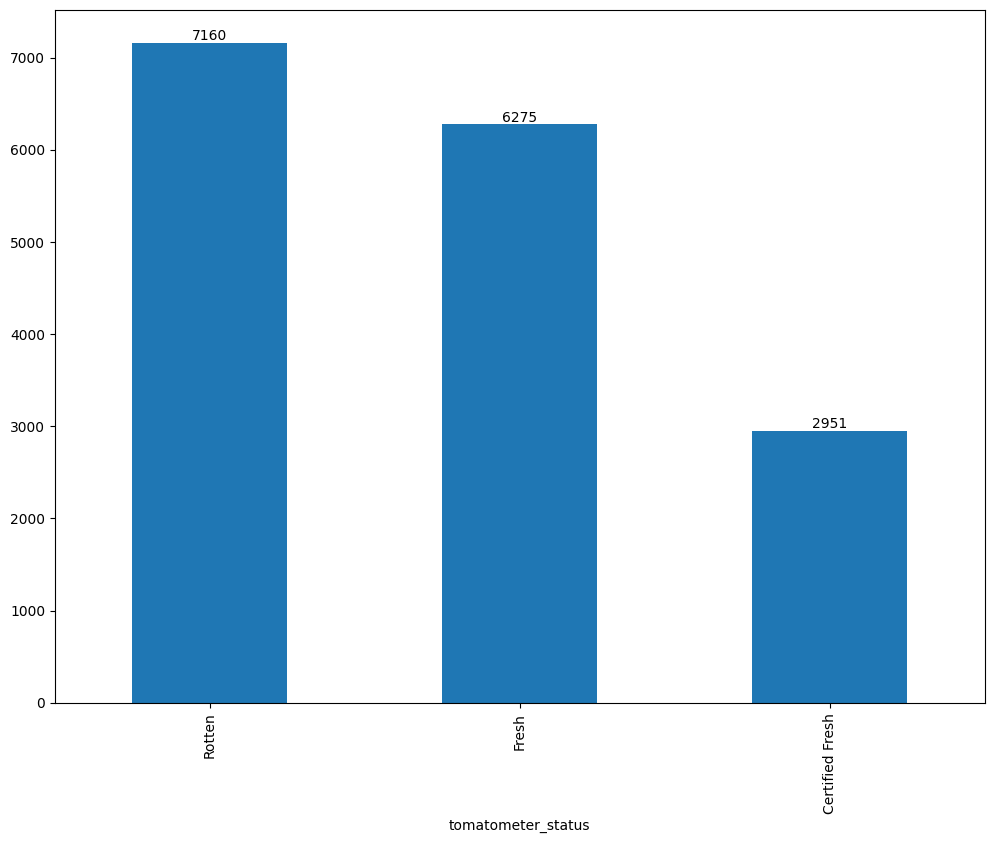

In [13]:
# unique categories and their distribution in the tomatometer_status column
ax = rt_data2.tomatometer_status.value_counts(). plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])  # type: ignore

<ipython-input-14-e7ee4634ee35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rt_data2['directors'].fillna('Unknown', inplace=True)
<ipython-input-14-e7ee4634ee35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data2['directors'].fillna('Unknown', inplace=True)
<ipython-input-14-e7ee4634ee35>:10: SettingWithCopyWarning: 
A value is try

Director Categories: ['5+ Movies Directed' '1 Movies Directed' '4 Movies Directed'
 '3 Movies Directed' '2 Movies Directed']


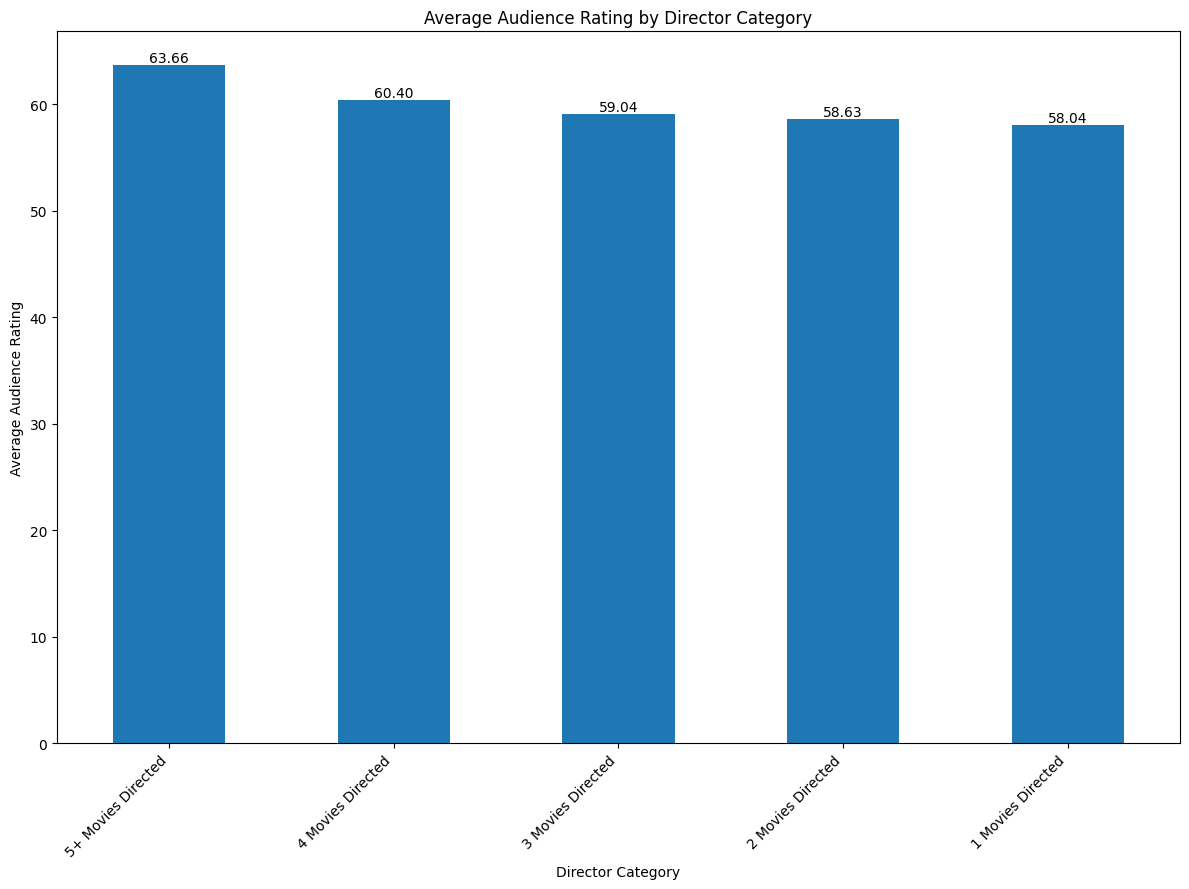

In [14]:
# Handle missing values in 'directors'
rt_data2['directors'].fillna('Unknown', inplace=True)

# Function to count movies per director
def count_movies(directors_str):
    directors = directors_str.split(',')
    return len(directors)

# Create a new column for the number of movies directed
rt_data2['num_directors'] = rt_data2['directors'].apply(count_movies)

# Explode the directors column to have one row per director
rt_data2_exploded = rt_data2.assign(directors=rt_data2['directors'].str.split(',')).explode('directors')
rt_data2_exploded['directors'] = rt_data2_exploded['directors'].str.strip()

# Count movies per director
director_counts = rt_data2_exploded['directors'].value_counts()

# Categorize directors based on movie count
def categorize_directors(director):
    count = director_counts.get(director, 0) # Get count, default 0 if not found
    if count >= 5:
        return '5+ Movies Directed'
    elif count == 4:
        return '4 Movies Directed'
    elif count == 3:
        return '3 Movies Directed'
    elif count == 2:
        return '2 Movies Directed'
    else:
        return '1 Movies Directed'

rt_data2_exploded['director_category'] = rt_data2_exploded['directors'].apply(categorize_directors)

# Analyze director category vs. audience rating
print(f'Director Categories: {rt_data2_exploded.director_category.unique()}')

# Calculate average audience rating for each category
category_ratings = rt_data2_exploded.groupby('director_category')['audience_rating'].mean().sort_values(ascending=False)

# Plot the results
ax = category_ratings.plot(kind='bar', figsize=(12, 9))
plt.title('Average Audience Rating by Director Category')
plt.xlabel('Director Category')
plt.ylabel('Average Audience Rating')
ax.bar_label(ax.containers[0], fmt='%.2f')  # type: ignore
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Disrtibution of the Movie runtime
*   Some of the catergoires data entries not enoug for model training
*   category range need to be change then can minimize outliers and reduce model noice



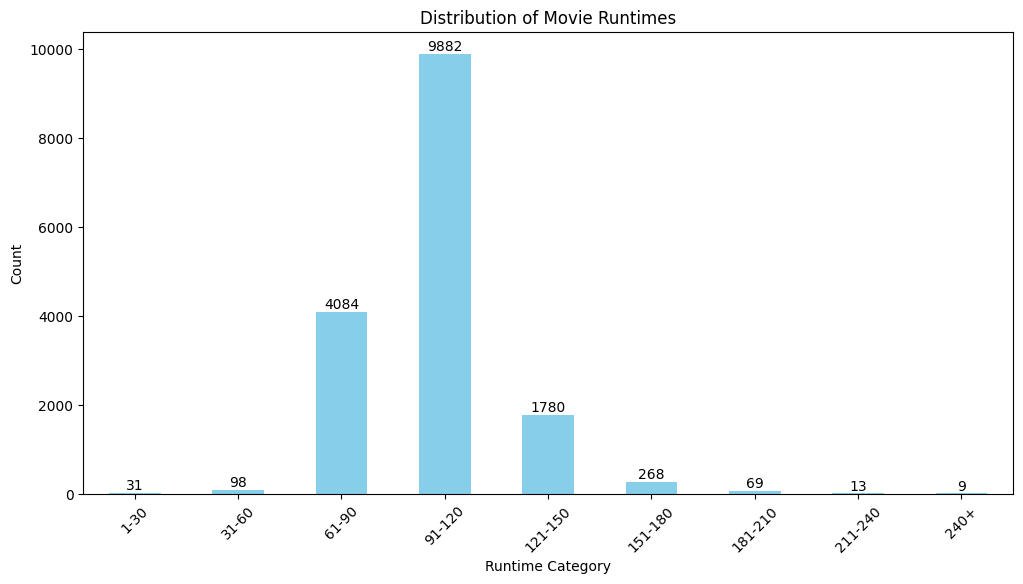

In [15]:
# Define the bins for categorizing runtime
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 300]
labels = ['1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '240+']

# Create the categorized runtime data without modifying the existing DataFrame
runtime_category = pd.cut(rt_data2['runtime_in_minutes'], bins=bins, labels=labels)

# Visualize the distribution of runtime categories
plt.figure(figsize=(12, 6))
ax = runtime_category.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add counts above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

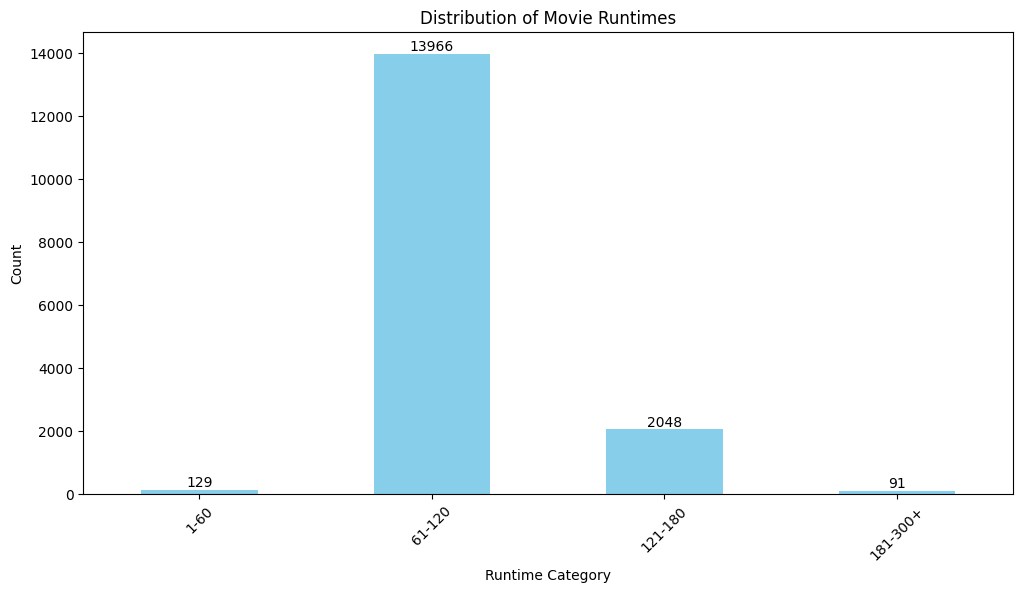

In [16]:
# Define the bins for categorizing runtime
bins = [0, 60, 120, 180, 300]
labels = ['1-60', '61-120', '121-180', '181-300+']

# Create the categorized runtime data without modifying the existing DataFrame
runtime_category = pd.cut(rt_data2['runtime_in_minutes'], bins=bins, labels=labels)

# Visualize the distribution of runtime categories
plt.figure(figsize=(12, 6))
ax = runtime_category.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add counts above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-1b6324ed7293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data2['in_theaters_date'] = pd.to_datetime(rt_data2['in_theaters_date'], errors='coerce')
<ipython-input-17-1b6324ed7293>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data2['release_month'] = rt_data2['in_theaters_date'].dt.month


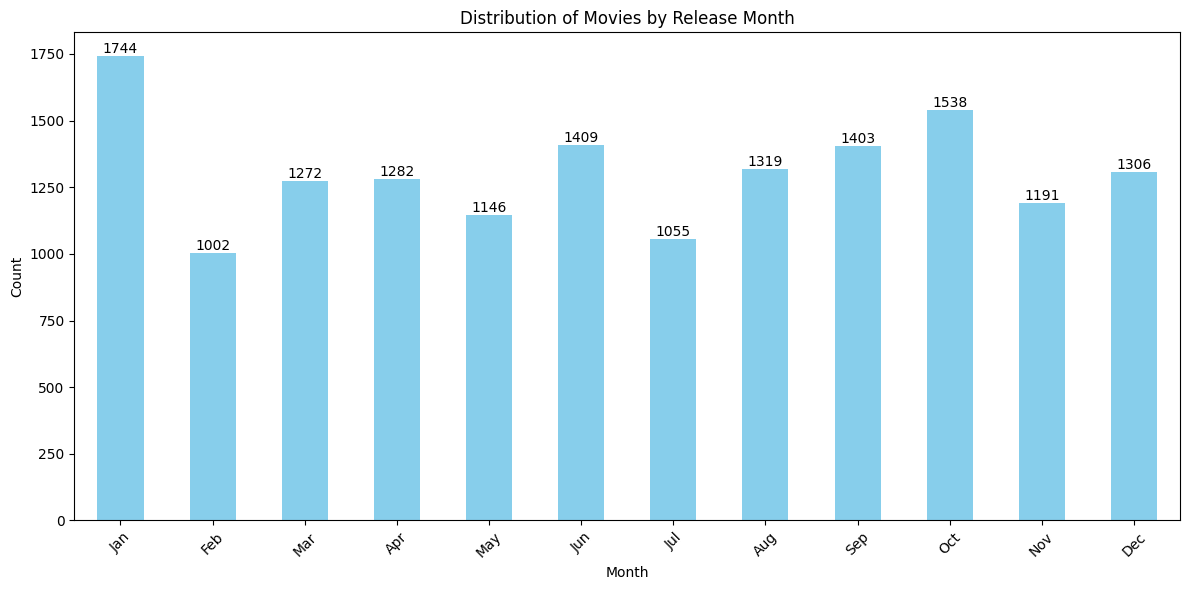

In [17]:
# Ensure 'in_theaters_date' is in datetime format
rt_data2['in_theaters_date'] = pd.to_datetime(rt_data2['in_theaters_date'], errors='coerce')

# Extract the month from 'in_theaters_date'
rt_data2['release_month'] = rt_data2['in_theaters_date'].dt.month

# Count the number of movies released in each month
month_counts = rt_data2['release_month'].value_counts().sort_index()

# Visualize the distribution of movies by month
plt.figure(figsize=(12, 6))
ax = month_counts.plot(kind='bar', color='skyblue')

# Add counts above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Distribution of Movies by Release Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<ipython-input-18-0fa39ce538f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data2['on_streaming_date'] = pd.to_datetime(rt_data2['on_streaming_date'], errors='coerce')
<ipython-input-18-0fa39ce538f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data2['stream_release_month'] = rt_data2['on_streaming_date'].dt.month


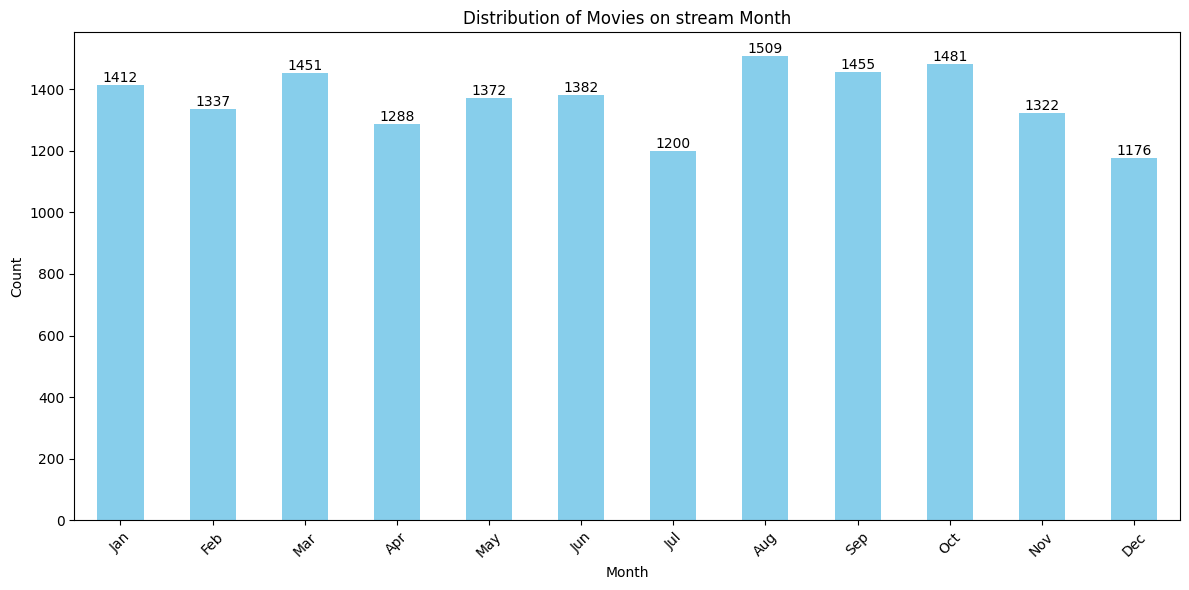

In [18]:
# Ensure 'on_streaming_date' is in datetime format
rt_data2['on_streaming_date'] = pd.to_datetime(rt_data2['on_streaming_date'], errors='coerce')

# Extract the month from 'on_streaming_date'
rt_data2['stream_release_month'] = rt_data2['on_streaming_date'].dt.month

# Count the number of movies released in each month
month_counts_streaming = rt_data2['stream_release_month'].value_counts().sort_index()

# Visualize the distribution of movies by month
plt.figure(figsize=(12, 6))
ax = month_counts_streaming.plot(kind='bar', color='skyblue')

# Add counts above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Distribution of Movies on stream Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

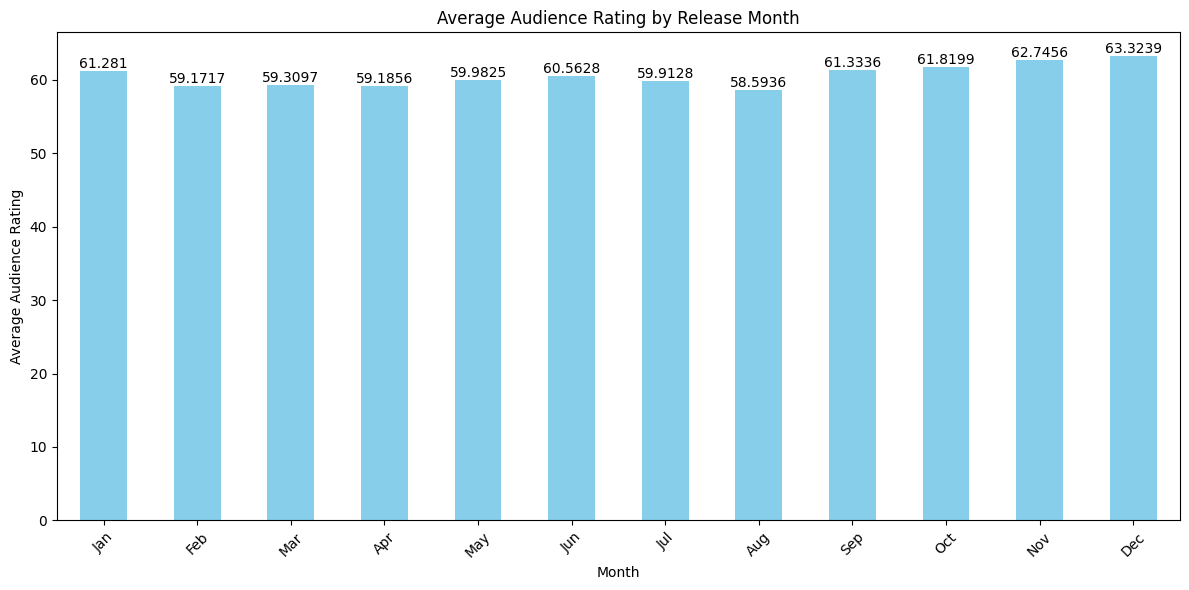

In [19]:
# Calculate the average audience rating for each month of release
month_avg_rating = rt_data2.groupby('release_month')['audience_rating'].mean()

# Visualize the comparison between average audience rating and movie release month
plt.figure(figsize=(12, 6))
ax = month_avg_rating.plot(kind='bar', color='skyblue')

# Add average ratings above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Average Audience Rating by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Audience Rating')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

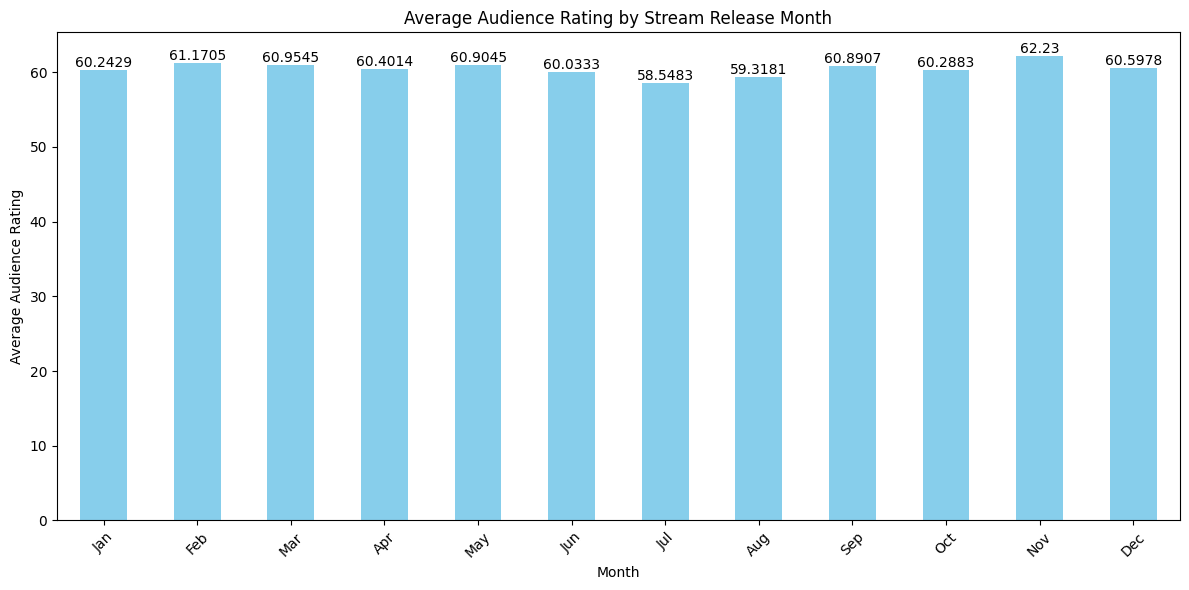

In [20]:
# Calculate the average audience rating for each month of release
month_avg_rating = rt_data2.groupby('stream_release_month')['audience_rating'].mean()

# Visualize the comparison between average audience rating and movie release month
plt.figure(figsize=(12, 6))
ax = month_avg_rating.plot(kind='bar', color='skyblue')

# Add average ratings above each bar
ax.bar_label(ax.containers[0])  # type: ignore

# Add titles and labels
plt.title('Average Audience Rating by Stream Release Month')
plt.xlabel('Month')
plt.ylabel('Average Audience Rating')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Pipeline Building, data imupting and encoding

## Dropping high cardinality columns

In [62]:
rt_data3 = rt_data2.drop(['movie_title','movie_info','critics_consensus','cast','in_theaters_date','on_streaming_date'],axis=1)
rt_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16386 entries, 0 to 16637
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              16386 non-null  object 
 1   genre               16369 non-null  object 
 2   directors           16282 non-null  object 
 3   writers             15109 non-null  object 
 4   runtime_in_minutes  16239 non-null  float64
 5   studio_name         16010 non-null  object 
 6   tomatometer_status  16386 non-null  object 
 7   tomatometer_rating  16386 non-null  int64  
 8   tomatometer_count   16386 non-null  int64  
 9   audience_rating     16386 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.4+ MB


# data split into features and target

In [88]:
X = rt_data3.drop(columns=['audience_rating'],axis=1)
y = rt_data3['audience_rating']

Data splitting into three set as a Train set, Test set, Validation Test

In [89]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_val.shape,y_val.shape)

(11470, 9) (2458, 9) (11470,) (2458,) (2458, 9) (2458,)


## Pipeline Building

In [90]:
class ListToStringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert numpy array to DataFrame if necessary
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        elif isinstance(X, pd.Series):
            X = pd.DataFrame(X)

        # Use apply instead of deprecated applymap
        return X.apply(lambda x: x.map(lambda val: ','.join(val) if isinstance(val, list) else str(val)))

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Convert numpy array to Series if necessary
        if isinstance(X, np.ndarray):
            X = pd.Series(X.ravel())
        elif isinstance(X, pd.DataFrame):
            X = X.iloc[:,0]

        self.frequencies_ = X.value_counts(normalize=False).to_dict()
        return self

    def transform(self, X):
        # Convert numpy array to Series if necessary
        if isinstance(X, np.ndarray):
            X = pd.Series(X.ravel())
        elif isinstance(X, pd.DataFrame):
            X = X.iloc[:,0]

        return pd.DataFrame(X.map(self.frequencies_).fillna(0))


In [91]:
# Rating pipeline
rating_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [92]:
# Genre pipeline
genre_pipeline = Pipeline([
    ('list_to_string', ListToStringTransformer()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [93]:
# Text pipeline for directors, writers, studio
text_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('frequency', FrequencyEncoder())
])

In [94]:
# Status pipeline
status_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [95]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [96]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('rating', rating_pipeline, ['rating']),
        ('genre', genre_pipeline, ['genre']),
        ('directors', text_pipeline, ['directors']),
        ('writers', text_pipeline, ['writers']),
        ('studio', text_pipeline, ['studio_name']),
        ('tomatometer_status', status_pipeline, ['tomatometer_status']),
        ('numerical', numerical_pipeline, ['tomatometer_rating', 'tomatometer_count'])
    ],
    remainder='drop',
    sparse_threshold=0
)

In [145]:
# Full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',  # type: ignore
    bootstrap=True,
    oob_score=True,
    random_state=42
    ))
])

## Fit training dataset to Pipeline (RandomForestRegressor)

In [146]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('rating',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['rating']),
                                                 ('genre',
                                                  Pipeline(steps=[('list_to_string',
                                                                   ListToStringTransformer()),
                                                                  ('imputer',
                                                                   SimpleIm...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['tomatometer_status']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tomatometer_rating',
                                                   'tomatometer_count'])])),
                ('model',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                                       min_samples_split=3, n_estimators=300,
                                       oob_score=True, random_state=42))])

## accuracy score checking on validation dataset RandomForestRegressor model

In [147]:
# Step 2: Predict on the validation data (X_val)
y_val_pred = full_pipeline.predict(X_val)

# Evaluate accuracy on validation set (e.g., using R-squared or Mean Squared Error)
# R2 is commonly used for regression tasks to check the proportion of variance explained by the model
print("Validation Data Evaluation:")
print("R-squared:", r2_score(y_val, y_val_pred))  # Correctly use y_val here
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred))  # Lower MSE is better

Validation Data Evaluation:
R-squared: 0.3782820610707537
Mean Squared Error: 254.85655428274674


## Change ML model to GradientBoostingRegressor Model


In [116]:
# Full pipeline
full_pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
    n_estimators=100,          # Number of boosting rounds (trees)
    learning_rate=0.05,        # Lower learning rate to reduce outlier influence
    max_depth=3,               # Shallower trees to avoid overfitting outliers
    min_samples_split=10,      # Minimum number of samples to split a node
    min_samples_leaf=10,       # Minimum samples per leaf
    subsample=0.9,             # Use 90% of data for each tree to reduce outlier influence
    loss='huber',              # Use Huber loss to be less sensitive to outliers
    random_state=42            # For reproducibility
))
])

## Fit training dataset to Pipeline (GradientBoostingRegressor)

In [117]:
full_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('rating',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['rating']),
                                                 ('genre',
                                                  Pipeline(steps=[('list_to_string',
                                                                   ListToStringTransformer()),
                                                                  ('imputer',
                                                                   SimpleIm...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['tomatometer_status']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tomatometer_rating',
                                                   'tomatometer_count'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, loss='huber',
                                           min_samples_leaf=10,
                                           min_samples_split=10,
                                           random_state=42, subsample=0.9))])

## accuracy score checking on validation dataset GradientBoostingRegressor model

In [119]:
# Step 2: Predict on the validation data (X_val)
y_val_pred = full_pipeline.predict(X_val)

# Evaluate accuracy on validation set (e.g., using R-squared or Mean Squared Error)
# R2 is commonly used for regression tasks to check the proportion of variance explained by the model
print("Validation Data Evaluation:")
print("R-squared:", r2_score(y_val, y_val_pred))  # Correctly use y_val here
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred))  # Lower MSE is better

Validation Data Evaluation:
R-squared: 0.5027380635126795
Mean Squared Error: 203.83916206018782


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Final thoughts


1.   Dataset must be improoved in the dataset 98  unique values in audience   
     rating cosindering data set size not enough to train the model highest accuracy
2.   Due to time limitaion can't do hyperparamtert tuning need to use  
     gridsearch or randomsearch

3.   as a future improovemnets need to check features corrreltation to target
     and feature score from the randomforest regressor  





# Contact info:

*   Email - chandima.seanrathna97@gmail.com
*   Phone number - +94787580595

If you can please give me a feedback what are the areas i have to improove i'm self fast learner i'm eager to learn machine learning